Import the library with all predefine functions

In [1]:
import lazy_pipeline as lpipe

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20, 10)
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

Check library versions

In [3]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.7.13
1.3.5
1.0.2


Run seamlessly on 
* python = 3.9.13, 
* pandas = 1.5.1
* scikit-learn = 1.1.3

# Prepare the data

The dataset that we are going to explore is [Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking). The target is to find smokers by vital signs from medical data.

Load data

In [4]:
df = lpipe.load_data('smoking')
print(df.shape)
df.head(n=10)

(55692, 26)


,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,128.0,76.0,95.0,217.0,199.0,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,153.0,96.0,158.0,222.0,269.0,34.0,134.0,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,F,50,150,60,85.0,0.7,0.8,1.0,1.0,115.0,74.0,86.0,210.0,66.0,48.0,149.0,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,M,45,175,75,89.0,1.0,1.0,1.0,1.0,113.0,64.0,94.0,198.0,147.0,43.0,126.0,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


Let's explore data and decide upon binarization strategy.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


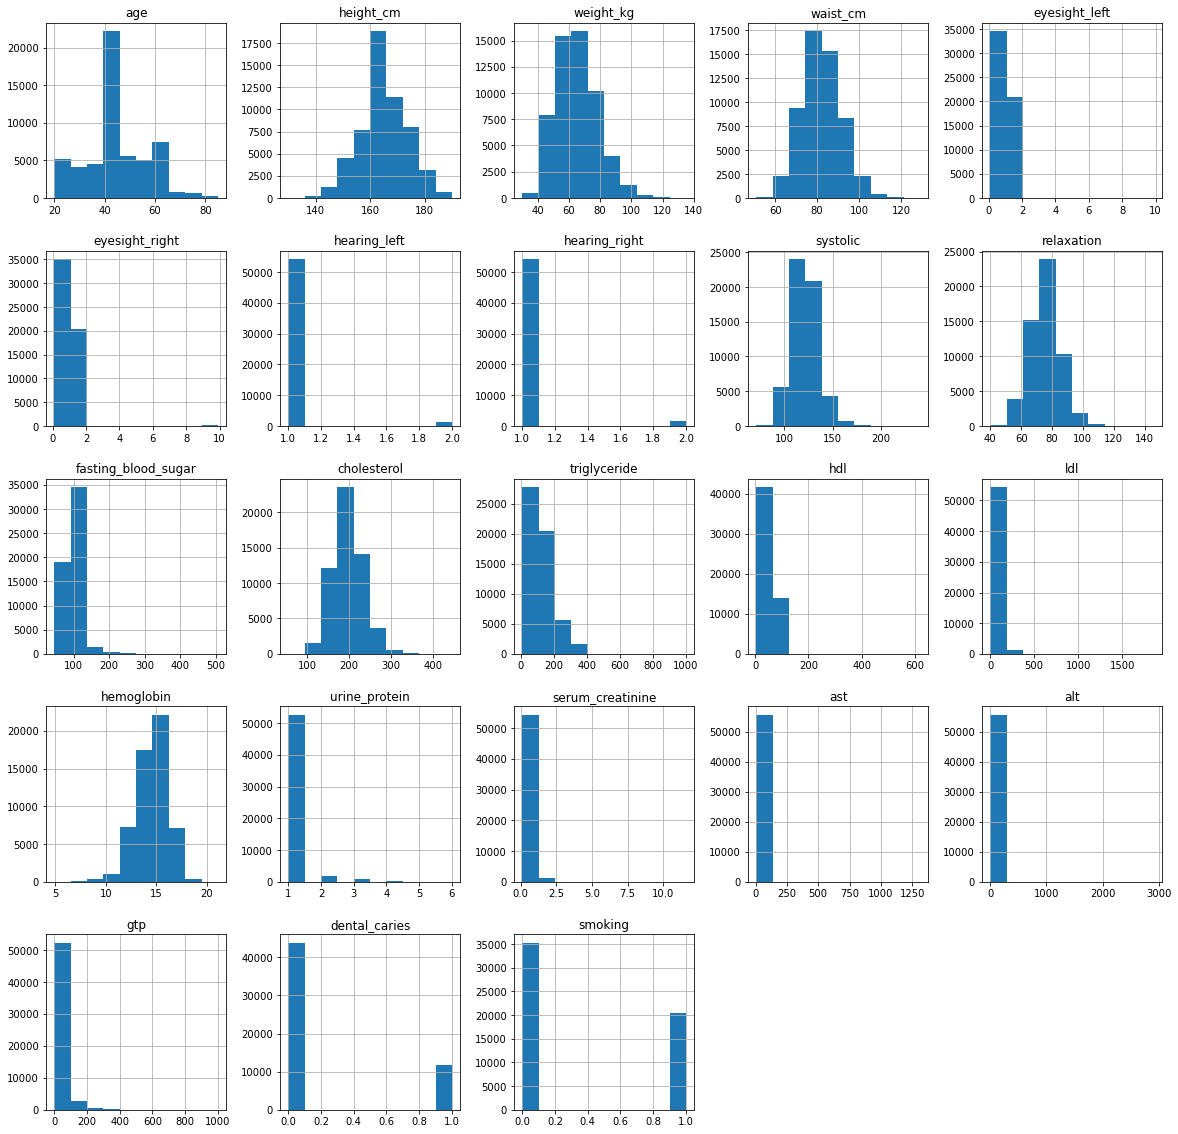

In [8]:
df.hist(figsize=(20, 20), bins=10, legend=False);

Most values are of continuous type (i.e age of type `int64` or waist_cm of type `float64`), and some values are categoric (like gender of type `object`).
- categoric values will be converted to indicator values via `pd.get_dummies()`
- continuous values will be first converted to categorical via `pd.qcut()` method that assigns labels to values according to the bins, and then to indicator values via `pd.get_dummies()`

Binarize data

In [9]:
y_name = 'smoking'

In [10]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(55692, 63)


,gender: F,gender: M,"age: (19.999, 40.0]","age: (40.0, 50.0]","age: (50.0, 85.0]","height_cm: (129.999, 160.0]","height_cm: (160.0, 170.0]","height_cm: (170.0, 190.0]","weight_kg: (29.999, 60.0]","weight_kg: (60.0, 70.0]","weight_kg: (70.0, 135.0]","waist_cm: (50.999, 78.0]","waist_cm: (78.0, 86.0]","waist_cm: (86.0, 129.0]","eyesight_left: (0.099, 0.9]","eyesight_left: (0.9, 1.2]","eyesight_left: (1.2, 9.9]","eyesight_right: (0.099, 0.9]","eyesight_right: (0.9, 1.2]","eyesight_right: (1.2, 9.9]","hearing_left: (0.999, 2.0]","hearing_right: (0.999, 2.0]","systolic: (70.999, 116.0]","systolic: (116.0, 127.0]","systolic: (127.0, 240.0]","relaxation: (39.999, 71.0]","relaxation: (71.0, 80.0]","relaxation: (80.0, 146.0]","fasting_blood_sugar: (45.999, 91.0]","fasting_blood_sugar: (91.0, 100.0]","fasting_blood_sugar: (100.0, 505.0]","cholesterol: (54.999, 180.0]","cholesterol: (180.0, 210.0]","cholesterol: (210.0, 445.0]","triglyceride: (7.999, 84.0]","triglyceride: (84.0, 138.0]","triglyceride: (138.0, 999.0]","hdl: (3.999, 50.0]","hdl: (50.0, 62.0]","hdl: (62.0, 618.0]","ldl: (0.999, 99.0]","ldl: (99.0, 127.0]","ldl: (127.0, 1860.0]","hemoglobin: (4.899, 14.0]","hemoglobin: (14.0, 15.4]","hemoglobin: (15.4, 21.1]","urine_protein: (0.999, 6.0]","serum_creatinine: (0.099, 0.8]","serum_creatinine: (0.8, 1.0]","serum_creatinine: (1.0, 11.6]","ast: (5.999, 20.0]","ast: (20.0, 26.0]","ast: (26.0, 1311.0]","alt: (0.999, 17.0]","alt: (17.0, 27.0]","alt: (27.0, 2914.0]","gtp: (0.999, 19.0]","gtp: (19.0, 35.0]","gtp: (35.0, 999.0]",oral: Y,"dental_caries: (-0.001, 1.0]",tartar: N,tartar: Y
0,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,True,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,True,False,True
1,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True
2,False,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,False,True,False,True,True,True,False
3,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,True,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False,False,True,True,False,True
4,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,True,True,False


That's a lot of data and the algorithm works for considerable time. Let's clip the data.

In [11]:
from sklearn.model_selection import train_test_split

X, _, y, _= train_test_split(X, y, train_size=1000, stratify=y, shuffle=True, random_state=17)

In [12]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'age: (50.0, 85.0]',
 'alt: (0.999, 17.0]',
 'ast: (5.999, 20.0]',
 'cholesterol: (180.0, 210.0]',
 'dental_caries: (-0.001, 1.0]',
 'eyesight_left: (0.099, 0.9]',
 'eyesight_right: (0.099, 0.9]',
 'fasting_blood_sugar: (45.999, 91.0]',
 'gender: F',
 'gtp: (0.999, 19.0]',
 'hdl: (3.999, 50.0]',
 'hearing_left: (0.999, 2.0]',
 'hearing_right: (0.999, 2.0]',
 'height_cm: (129.999, 160.0]',
 'hemoglobin: (4.899, 14.0]',
 'ldl: (99.0, 127.0]',
 'oral: Y',
 'relaxation: (39.999, 71.0]',
 'serum_creatinine: (0.099, 0.8]',
 'systolic: (70.999, 116.0]',
 'tartar: Y',
 'triglyceride: (84.0, 138.0]',
 'urine_protein: (0.999, 6.0]',
 'waist_cm: (50.999, 78.0]',
 'weight_kg: (29.999, 60.0]'}

In [13]:
y_bin = y.values.tolist()

Assume that at the very begining, we know the labels only for the first 10% of rows.

In [14]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(100, 900)

Set up the test target labels $y$

In [15]:
y_test = y_bin[n_train:]

# Make predictions with original algorithm

Make predictions and measure time required to obtain these predictions

In [16]:
%%time
gen = lpipe.predict_array(X_bin, y_bin, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████████| 1000/1000 [01:09<00:00, 12.89it/s]

CPU times: user 1min 9s, sys: 611 ms, total: 1min 9s
Wall time: 1min 9s


In [17]:
%%time
gen = list(lpipe.predict_array(X_bin, y_bin, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████| 1000/1000 [00:02<00:00, 395.94it/s]

CPU times: user 2.25 s, sys: 30.3 ms, total: 2.28 s
Wall time: 2.28 s


Evaluate predictions

Let's use two metrics: accuracy score and F1 score.
- accuracy score is a valid metric, because the dataset is balanced (there is no clear imbalance between "non-smokers" and "smokers") and the metric is overall simple
- F1 score minimizes the False Negative prediction which is the most harmful in the case of our dataset (when someone is a smoker but was not detected as such)

In [18]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Analyze results

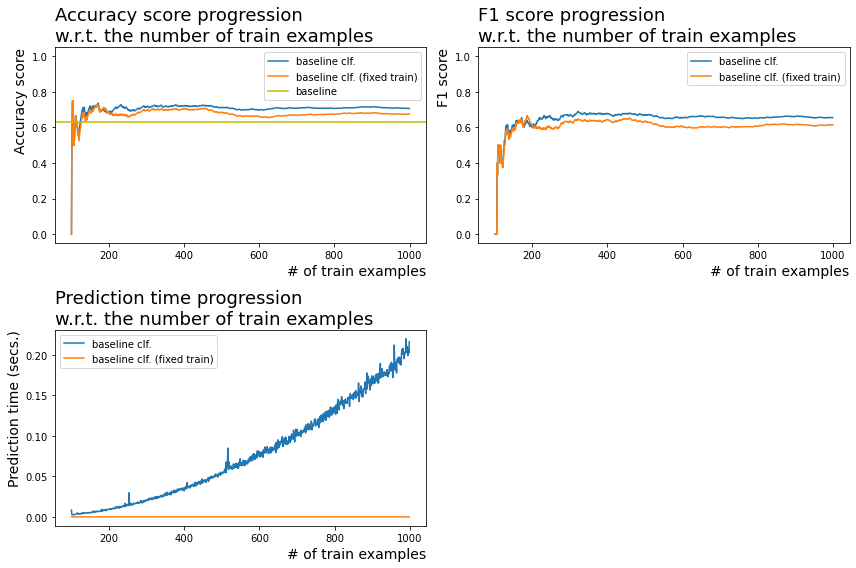

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')

# add baseline for accuracy_score which is the percentage of the biggest class
axs[0,0].axhline(y=(len(y)-sum(y))/len(y), color='y', linestyle='-', label='baseline')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison_orig.png')
plt.show()

In [20]:
print(f"Resulting accuracy score: {score_vals['accuracy_score'][-1]}\tResulting F1 score: {score_vals['f1_score'][-1]}")

Resulting accuracy score: 0.7063403781979978	Resulting F1 score: 0.6544502617801047


# Make predictions with an enhanced algorithm

In [21]:
y_test = y[n_train:]

Let's try to enhance our algorithm by translating it to numpy.

In [22]:
import time
from tqdm import tqdm

def predict_with_generators(x, X_train, Y_train, min_cardinality = 3):
    X_pos = X_train[Y_train]  # if y
    X_neg = X_train[~Y_train]  # if not y

    intersections_pos = x.reshape(1, -1) & X_pos  # bitwise comparison: x with each row of X_pos
    intersections_pos = intersections_pos[intersections_pos.sum(axis=1) >= min_cardinality]  # if number of matches (len) in an intersection is bigger than min_carinality, then keep it 
    intersections_pos = intersections_pos @ (~X_neg.T)  # if row of intersections_pos is contained in column of X_neg, then the product of the row and inverted column is zero 
    n_counters_pos    = (intersections_pos == 0).sum()  # count all equalities of intersection_pos and X_neg 
    
    intersections_neg = x.reshape(1, -1) & X_neg
    intersections_neg = intersections_neg[intersections_neg.sum(axis=1) >= min_cardinality]
    intersections_neg = intersections_neg @ (~X_pos.T)
    n_counters_neg    = (intersections_neg == 0).sum()

    perc_counters_pos = n_counters_pos / len(X_pos)
    perc_counters_neg = n_counters_neg / len(X_neg)

    prediction = perc_counters_pos < perc_counters_neg
    return prediction


def predict_array(X, Y, n_train, update_train = True, use_tqdm = False, predict_func = predict_with_generators):
    for i, x in tqdm(
        X[n_train:].iterrows(),
        initial=n_train, total=len(X),
        desc='Predicting step by step',
        disable=not use_tqdm,
    ):
        n_trains = n_train + i if update_train else n_train
        yield predict_func(x.values, X[:n_trains].values, Y[:n_trains].values, min_cardinality=8)


def apply_stopwatch(iterator):
    outputs = []
    times = []

    t_start = time.time()
    for out in iterator:
        dt = time.time() - t_start
        outputs.append(out)
        times.append(dt)
        t_start = time.time()

    return outputs, times


Make predictions and measure time required to obtain these predictions

In [23]:
%%time
gen = predict_array(X, y, n_train, use_tqdm=True)
y_preds, t_preds = apply_stopwatch(gen)

Predicting step by step: 100%|██████████████| 1000/1000 [00:24<00:00, 37.22it/s]

CPU times: user 24 s, sys: 171 ms, total: 24.2 s
Wall time: 24.2 s


In [24]:
%%time
gen = list(predict_array(X, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = apply_stopwatch(gen)

Predicting step by step: 100%|████████████| 1000/1000 [00:00<00:00, 1711.42it/s]

CPU times: user 519 ms, sys: 11.6 ms, total: 531 ms
Wall time: 529 ms


As we can see, prediction time is better.

In [25]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Analyze results

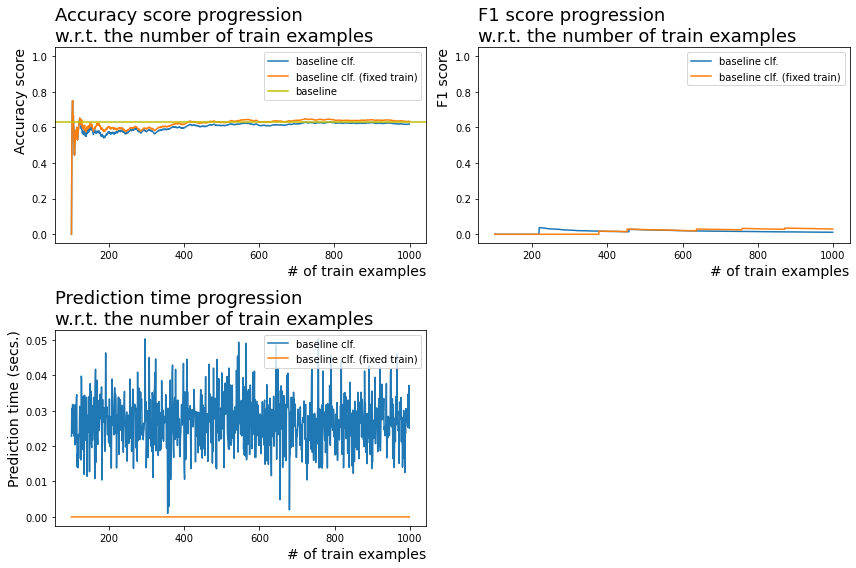

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')

# add baseline for accuracy_score which is the percentage of the biggest class
axs[0,0].axhline(y=(len(y)-sum(y))/len(y), color='y', linestyle='-', label='baseline')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison_mod.png')
plt.show()

In [27]:
print(f"Resulting accuracy score: {score_vals['accuracy_score'][-1]}\tResulting F1 score: {score_vals['f1_score'][-1]}")

Resulting accuracy score: 0.6184649610678532	Resulting F1 score: 0.011527377521613834


While prediction time is better, the accuracy_score is worse and F1 score is really bad. As we said before, F1 score was more important, because it let us minimize False Negative predictions.

# Compare with other models.

Let's compare our Lazy model to a Decision Tree, Random Forest and CatBoost.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, shuffle = True, random_state = 17)

dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
dct_acc = accuracy_score(y_test, y_pred)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred)

clf = CatBoostClassifier(verbose=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, y_pred)

print(f'Accuracy of:\nDecisionTreeClassifier: {dct_acc}\tRandomForestClassifier: {rfc_acc}\tCatBoostClassifier: {clf_acc}')

Accuracy of:
DecisionTreeClassifier: 0.68	RandomForestClassifier: 0.71	CatBoostClassifier: 0.73


# In conclusion:


- the chosen dataset of binary classification was prepared and binarized for the task
- the original lazy classifier was used for prediction with resulting scores: accuracy score: `0.7063403781979978`, F1 score: `0.6544502617801047`; time spent for prediction was `1min 9s` with train updates and `2.28 s` without train updates
- lazy classifier was enhanced and translated to numpy; resulting scores in prediction: accuracy score: `0.6184649610678532`, F1 score: `0.011527377521613834`; time spent for predictions: `24.2 s` with train updates and `529 ms` without train updates
- popular rule-based models were used for prediction with resulting accuracy scores:DecisionTreeClassifier: `0.68`, RandomForestClassifier: `0.71`, CatBoostClassifier: `0.73`